# Dealing with data

One of the most important parts about deep learning is data. Data is pure raw information, human and machine representation of the observation of the world. Everything can be represented in data, including our literature, arts and science. In this lab, we are going to deal with data, apply some techniques to make our data ready to be applied in a machine learning model, and after that, separate our dataset in training, validation and test datasets and feed that data to a deep learning model. 

## Acquiring data

Before you can even prepare your dataset, you need to acquire one. Unless you already work in a place where you already have that data ready for you, you need to collect it yourself. There are a lot of places where you can acquire data, for example:

- [Datasets subreddit](https://www.reddit.com/r/datasets/), a community where you can share, request and discuss about datasets;

- [Kaggle](https://www.kaggle.com/), where you can search for a lot of different datasets, jupyter notebooks applying that data, and even engage in competitions;

- [Awesome datasets in Github](https://github.com/awesomedata/awesome-public-datasets), a curated list of datasets of a lot of different subjects, hosted in Github.

Sometimes, your data will not be easily available, and you will have to get your hands dirty to collect it. While it is beyond the scope of this lab, it is worth to mention that common data collection techniques involve the usage of sensors and [web-scraping](https://en.wikipedia.org/wiki/Web_scraping).


## Preprocessing the data

Let's say we downloaded the records of a HR department of a company specialized in engineering. This dataset in particular, is about the hires for a software engineering position.

In [1]:
# First, let's import our packages as usual.
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# Then, let's load our dataset.
import os.path
path = "./Datasets/hires.csv"
if os.path.isfile(path) :
    dataset = pd.read_csv(path)
else:
    dataset = pd.read_csv("3-Feeding-your-models-with-data/" + path)

# Let's take a look at the columns we have in this dataset.
print("Dataset Columns: {}\n".format(dataset.columns.values))

Dataset Columns: ['id' 'years_of_experience' 'interview_score' 'name' 'hired']



As you can see, we have the following features:

- name: the candidate name;
- interview_score: a subjective grade that was given to the performance of the candidate in the hiring interview;
- years_of_experience: how many years this particular candidate has in the software engineering industry

And a class:

- hired: which means if the candidate ended up being hired or not;


Now, let's take a closer look at our dataset: 

In [3]:
# To see some of the data inside our dataset, simply use the dataset variable.
dataset

,id,years_of_experience,interview_score,name,hired
0,1,18,0.54,Stacia Ketchen,False
1,2,6,0.29,Maryann Rumney,False
2,3,6,NaN,Tristam Oliveti,False
3,4,2,0.51,Andrea Gianinotti,False
4,5,2,0.74,Karena Sheran,False
...,...,...,...,...,...
995,996,6,0.78,Leese Ciccoloi,False
996,997,5,0.67,Inger Ivashechkin,False
997,998,5,0.46,Jessalyn Bedingfield,False
998,999,5,0.89,Deerdre Squibe,True


There are some incomplete data inside our dataset. Incomplete data is, most of the times, bad data. So, we need to remove them.

In [4]:
import math
# Remove empty rows from dataset
for index, data in dataset.iterrows():
    if(math.isnan(data.interview_score) or math.isnan(data.years_of_experience)):
        dataset.drop(index = index, inplace = True)

# Show the updated dataset        
dataset

,id,years_of_experience,interview_score,name,hired
0,1,18,0.54,Stacia Ketchen,False
1,2,6,0.29,Maryann Rumney,False
3,4,2,0.51,Andrea Gianinotti,False
4,5,2,0.74,Karena Sheran,False
6,7,9,0.40,Rafaellle Goodbody,False
...,...,...,...,...,...
994,995,6,0.67,Alexine Bannister,False
995,996,6,0.78,Leese Ciccoloi,False
996,997,5,0.67,Inger Ivashechkin,False
997,998,5,0.46,Jessalyn Bedingfield,False


We also need to decide what features are important for the problem we are trying to solve. Deciding what features are important, is a key part of machine learning. Remember, bad data equals to bad results, and wrong features are bad data.

In this case, the interview score and the years of experience of the candidate are important features, but the name of the candidate is completely irrelevant for our model, so we can just take it out from our dataset:

In [5]:
# Delete the column name
del dataset['name']
# Show our updated dataset
dataset

,id,years_of_experience,interview_score,hired
0,1,18,0.54,False
1,2,6,0.29,False
3,4,2,0.51,False
4,5,2,0.74,False
6,7,9,0.40,False
...,...,...,...,...
994,995,6,0.67,False
995,996,6,0.78,False
996,997,5,0.67,False
997,998,5,0.46,False


Another thing that you should have in mind, is that "True" and "False", doesn't mean anything to a machine. We need to convert that into something that a computer will understand:

In [6]:
# Convert true to 1, and false to 0
dataset.hired = dataset.hired.astype(int)
dataset

,id,years_of_experience,interview_score,hired
0,1,18,0.54,0
1,2,6,0.29,0
3,4,2,0.51,0
4,5,2,0.74,0
6,7,9,0.40,0
...,...,...,...,...
994,995,6,0.67,0
995,996,6,0.78,0
996,997,5,0.67,0
997,998,5,0.46,0


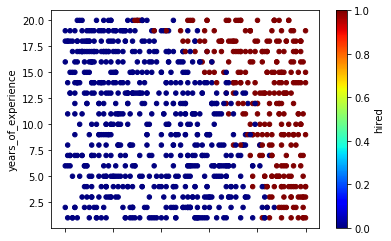

In [7]:
# Let's plot the dataset, so we can see who got hired and those who didn't.
dataset.plot(kind='scatter', x="interview_score", y="years_of_experience", c="hired", colormap='jet')

At this point, we could train our network using this dataset. But we could also improve it's representation to make it easier for the network to learn the dataset behavior. The attribute 'years_of_experience' is a value from 1 to 20 (inside our dataset). Let's normalize these values to fit between 0 and 1.

In [8]:
# Converts the dataset to numpy arrays
X = np.array(dataset[["id","years_of_experience","interview_score"]].astype(float))
Y = np.array(dataset[["hired"]])
Y = np.ravel(Y)

Now, let's separate our dataset into test and training datasets:

In [9]:
# Separate the dataset into test and training datasets
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.25,)

Now let's build a simple classification neural network and train it:

In [10]:
def build_model():
    # Input layer
    inputs = Input([3, ], name='data')
    # Hidden layers
    model = Dense(250, activation='relu')(inputs)
    # Output layer
    outputs = Dense(1, activation='relu', name='fc3')(model)

    # Define the model
    model = Model(inputs=[inputs], outputs=outputs)

    return model

net = build_model()
print(net.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               1000      
_________________________________________________________________
fc3 (Dense)                  (None, 1)                 251       
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
Y_train.mean()

0.3053097345132743

In [12]:
import keras.backend as K
def loss_function(y_true, y_pred):
    e = K.binary_crossentropy(y_true, y_pred)
    return e

In [ ]:
from keras import metrics
net.compile(optimizer='sgd',
              loss=loss_function,
              metrics=['accuracy'])

history = net.fit(X_train,
        Y_train,
        validation_data=(X_test, Y_test),
        epochs=1500,
        batch_size=8)

Train on 678 samples, validate on 227 samples
Epoch 1/1500
678/678 [==============================] - 0s 291us/step - loss: 6.7454 - accuracy: 0.4926 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 2/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 3/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 4/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 5/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 6/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 7/1500
678/678 [==============================] - 0s 130us/step - loss: 

678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 57/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 58/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 59/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 60/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 61/1500
678/678 [==============================] - 0s 135us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 62/1500
678/678 [==============================] - 0s 144us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_ac

Epoch 112/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 113/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 114/1500
678/678 [==============================] - 0s 131us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 115/1500
678/678 [==============================] - 0s 131us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 116/1500
678/678 [==============================] - 0s 148us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 117/1500
678/678 [==============================] - 0s 136us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 118/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_

678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 168/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 169/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 170/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 171/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 172/1500
678/678 [==============================] - 0s 132us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 173/1500
678/678 [==============================] - 0s 131us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 223/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 224/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 225/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 226/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 227/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 228/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 131us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 278/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 279/1500
678/678 [==============================] - 0s 133us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 280/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 281/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 282/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 283/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 333/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 334/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 335/1500
678/678 [==============================] - 0s 126us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 336/1500
678/678 [==============================] - 0s 126us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 337/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 338/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 388/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 389/1500
678/678 [==============================] - 0s 126us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 390/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 391/1500
678/678 [==============================] - 0s 131us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 392/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 393/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 137us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 443/1500
678/678 [==============================] - 0s 137us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 444/1500
678/678 [==============================] - 0s 138us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 445/1500
678/678 [==============================] - 0s 132us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 446/1500
678/678 [==============================] - 0s 134us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 447/1500
678/678 [==============================] - 0s 135us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 448/1500
678/678 [==============================] - 0s 134us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 498/1500
678/678 [==============================] - 0s 126us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 499/1500
678/678 [==============================] - 0s 126us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 500/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 501/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 502/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 503/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 553/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 554/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 555/1500
678/678 [==============================] - 0s 135us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 556/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 557/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 558/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 608/1500
678/678 [==============================] - 0s 142us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 609/1500
678/678 [==============================] - 0s 141us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 610/1500
678/678 [==============================] - 0s 132us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 611/1500
678/678 [==============================] - 0s 146us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 612/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 613/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 663/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 664/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 665/1500
678/678 [==============================] - 0s 126us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 666/1500
678/678 [==============================] - 0s 126us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 667/1500
678/678 [==============================] - 0s 126us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 668/1500
678/678 [==============================] - 0s 126us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 125us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 718/1500
678/678 [==============================] - 0s 139us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 719/1500
678/678 [==============================] - 0s 134us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 720/1500
678/678 [==============================] - 0s 131us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 721/1500
678/678 [==============================] - 0s 137us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 722/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 723/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 773/1500
678/678 [==============================] - 0s 131us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 774/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 775/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 776/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 777/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 778/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 828/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 829/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 830/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 831/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 832/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 833/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 883/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 884/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 885/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 886/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 887/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 888/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 938/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 939/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 940/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 941/1500
678/678 [==============================] - 0s 131us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 942/1500
678/678 [==============================] - 0s 134us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 943/1500
678/678 [==============================] - 0s 132us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 993/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 994/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 995/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 996/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 997/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 998/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - 

678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1048/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1049/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1050/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1051/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1052/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1053/1500
678/678 [==============================] - 0s 135us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5

678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1103/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1104/1500
678/678 [==============================] - 0s 132us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1105/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1106/1500
678/678 [==============================] - 0s 130us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1107/1500
678/678 [==============================] - 0s 131us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1108/1500
678/678 [==============================] - 0s 132us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5

678/678 [==============================] - 0s 126us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1158/1500
678/678 [==============================] - 0s 126us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1159/1500
678/678 [==============================] - 0s 138us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1160/1500
678/678 [==============================] - 0s 125us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1161/1500
678/678 [==============================] - 0s 127us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1162/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1163/1500
678/678 [==============================] - 0s 128us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5

678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1213/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1214/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1215/1500
678/678 [==============================] - 0s 133us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1216/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1217/1500
678/678 [==============================] - 0s 131us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5527 - val_accuracy: 0.7048
Epoch 1218/1500
678/678 [==============================] - 0s 129us/step - loss: 4.7094 - accuracy: 0.6947 - val_loss: 4.5

In [ ]:
metric_v = list(history.history.keys())
print(metric_v)

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history[metric_v[2]])
plt.plot(history.history[metric_v[0]])
plt.legend(['Train','Test'])
plt.show()

plt.title('Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.plot(history.history[metric_v[3]])
plt.plot(history.history[metric_v[1]])
plt.legend(['Train','Test'])
plt.show()

In [ ]:
# Print model performance
_, train_a = net.evaluate(X_train,  Y_train, verbose=2)
print('\nTrain accuracy:', train_a)

_, test_a = net.evaluate(X_test,  Y_test, verbose=2)
print('\nTest accuracy:', test_a)

# Predict if a new candidate with interview score of 0.6 and 15 years of experience will be hired
input = np.array([[0,0.5,0.5]])
prediction = net.predict(input)
for index, predict in enumerate(prediction):
    print("Candidate has {:.2f}% chance to be hired".format(predict[0]*100))

We can generate a map covering all the possible predictions to see how our model behaves

In [ ]:
# Generate a classification map
N = 60

years_range = (X[:,1].min(), X[:,1].max())
scores_range = (X[:,2].min()-.1, X[:,2].max()+.1)

linear_years = np.linspace(years_range[0], years_range[1], N)
linear_scores = np.linspace(scores_range[0], scores_range[1], N)

prediction_map = np.array([net.predict(np.array([[0,i,j]])) for j in linear_scores for i in linear_years]).reshape(N, N).T

# Plots our test dataset on top of our prediction map
plt.imshow(prediction_map,
           interpolation='bilinear',
           extent=[
               scores_range[0], scores_range[1],years_range[0], years_range[1], 
           ],
           aspect='auto' , origin='lower')
plt.scatter(np.array(X_train)[:,2], np.array(X_train)[:,1], 40, Y_train, edgecolors='w')
plt.show()

# Plots our test dataset on top of our prediction map
plt.imshow(prediction_map,
           interpolation='bilinear',
           extent=[
               scores_range[0], scores_range[1],years_range[0], years_range[1], 
           ],
           aspect='auto' , origin='lower')
plt.scatter(np.array(X_test)[:,2], np.array(X_test)[:,1], 40, Y_test, edgecolors='w')
plt.show()